In [21]:
import os
import glob

import matplotlib.pyplot as plt
import pandas as pd

In [47]:
EVALUATION_DIR = os.path.join('..', 'PROJECT','EVALUATION')
csv_files = [file for file in os.listdir(EVALUATION_DIR) if file.endswith('.csv')]

In [48]:
print(csv_files)

['ConvTasNet_SI-SDR_10_epochs.csv', 'TransUNet_MSE_mask_10_epochs.csv', 'UNetDNP_SI-SDR_10_epochs.csv']


In [49]:
data = []
for file in csv_files:
    df = pd.read_csv(os.path.join(EVALUATION_DIR, file), index_col=0)
    df = df.rename(columns=lambda x: f"{file.split('_')[0]}-{x}")
    data.append(df)

In [50]:
print([len(data[i]) for i in range(len(data))])

[6102, 6102, 6102]


In [51]:
df = pd.concat(data, axis=1)
df.head(100)

,ConvTasNet-SDR,ConvTasNet-SIR,ConvTasNet-SAR,ConvTasNet-PESQ-wb,ConvTasNet-PESQ-nb,ConvTasNet-STOI,TransUNet-SDR,TransUNet-SIR,TransUNet-SAR,TransUNet-PESQ-wb,TransUNet-PESQ-nb,TransUNet-STOI,UNetDNP-SDR,UNetDNP-SIR,UNetDNP-SAR,UNetDNP-PESQ-wb,UNetDNP-PESQ-nb,UNetDNP-STOI
0,17.977329,36.194252,18.059366,3.233226,3.619332,0.987433,-17.190773,21.550356,-17.190107,1.903501,2.604965,0.859736,13.857639,27.821121,14.035648,2.787961,3.291026,0.980017
1,16.407366,30.721937,16.582043,2.749493,3.086310,0.954985,-28.823135,7.440589,-28.822075,1.498836,2.041941,0.775531,14.561481,27.104801,14.823952,2.187067,2.761387,0.934991
2,21.725702,42.130928,21.768318,2.332600,2.878917,0.961150,-28.239105,27.532511,-28.239063,1.653467,2.426744,0.847371,16.849066,32.059937,16.985132,1.865367,2.459965,0.951456
3,17.294950,32.612717,17.424271,3.219516,3.516261,0.982699,-24.010597,20.164595,-24.007828,1.475019,2.167923,0.866576,9.539176,21.235958,9.847276,2.141226,2.801395,0.967590
4,11.786697,24.159729,12.053790,2.388928,2.930843,0.952874,-31.194708,4.688354,-31.193405,1.704571,2.005894,0.865473,10.682689,21.561144,11.202702,1.980907,2.370438,0.949077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9.039018,17.814907,10.232909,2.727755,3.459503,0.970570,-42.248493,-3.414976,-42.247875,1.775856,2.099677,0.787342,7.886894,15.834831,9.663186,2.122084,3.026285,0.944318
96,7.642513,16.612244,8.328856,1.610022,2.448010,0.873800,-28.558687,20.063210,-28.558208,1.293214,2.003531,0.735994,6.898644,13.395858,8.057158,1.407486,2.019726,0.787868
97,7.155613,14.750660,8.409345,2.625050,3.158883,0.975302,-22.658794,0.358758,-22.636963,1.578001,2.194465,0.850973,6.449680,14.132801,7.738622,2.267729,2.905412,0.964191
98,11.840889,24.024109,12.308667,2.939854,3.307030,0.920716,-28.886162,0.679283,-28.873001,1.950847,2.446984,0.809898,9.895709,28.450090,10.369237,2.393102,2.913766,0.901774


['ConvTasNet-SDR', 'TransUNet-SDR', 'UNetDNP-SDR']
ConvTasNet-SDR    10.69
TransUNet-SDR    -27.83
UNetDNP-SDR        7.61
dtype: float64


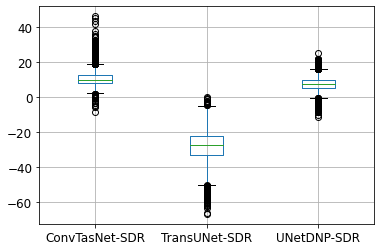

In [52]:
cols = [c for c in df.columns if any(metric in c for metric in ['SDR'])]#['SDR', 'SIR', 'SAR'])]
print(cols)

print(df[cols].mean().round(2))

plt.figure()
df[cols].boxplot(fontsize=12)
plt.show()

In [53]:
print(df.mean().round(2))

ConvTasNet-SDR        10.69
ConvTasNet-SIR        22.19
ConvTasNet-SAR        11.30
ConvTasNet-PESQ-wb     1.83
ConvTasNet-PESQ-nb     2.38
ConvTasNet-STOI        0.85
TransUNet-SDR        -27.83
TransUNet-SIR         12.24
TransUNet-SAR        -27.81
TransUNet-PESQ-wb      1.42
TransUNet-PESQ-nb      1.90
TransUNet-STOI         0.75
UNetDNP-SDR            7.61
UNetDNP-SIR           16.90
UNetDNP-SAR            8.55
UNetDNP-PESQ-wb        1.56
UNetDNP-PESQ-nb        2.07
UNetDNP-STOI           0.82
dtype: float64
